## Analysis on Population and Incarcerated Race Distributions

#### Preet Khowaja

In this notebook, I'm interested in looking at the following:
- How many counties have a higher % of black and hispanic populations in jail, than in their populations?
- What is, on average, the difference in these percentages across all counties?
- Which counties are significantly higher than the average? 

I'm using the data table I created from NHGIS and ACIS data saved in 10_cleaned_data/county_racial_representation_table.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
full_data = pd.read_csv('/Users/preetkhowaja/Desktop/qsides/10_cleaned_data/county_racial_representation_table.csv')
full_data.sample(3)

,Unnamed: 0,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,...,hisp_pop,other_pop,total_perc,black_pop_perc,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case
67,67,37135.0,107260.0,116090.0,36785.0,274906.0,39.016973,42.228980,13.380937,Orange County,...,12065,14764,100.0,11.641469,69.439822,8.507743,10.410967,1.178890,6.497062,5.511170
26,26,37053.0,2409.0,18290.0,526.0,21755.0,11.073316,84.072627,2.417835,Currituck County,...,988,796,100.0,5.422426,87.511387,3.913336,3.152850,0.827827,1.759679,2.125661
78,78,37157.0,49735.0,98314.0,10543.0,161681.0,30.761190,60.807392,6.520865,Rockingham County,...,5544,2478,100.0,18.624817,72.614289,6.054649,2.706245,1.478628,2.916325,1.972318


### Statistics for Black People

In [4]:
black_stats = full_data[['county_fips_code', 'COUNTY', 'black_perc_sys', 'black_pop_perc']]

In [5]:
## What is the difference in these percentages?
black_stats['diff_in_perc_black'] = (black_stats.black_perc_sys - black_stats.black_pop_perc)

/var/folders/3w/vg5tdhqd3fx1m3n150wrlhhh0000gn/T/ipykernel_63851/779978075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_stats['diff_in_perc_black'] = (black_stats.black_perc_sys - black_stats.black_pop_perc)


In [6]:
black_stats.head()

,county_fips_code,COUNTY,black_perc_sys,black_pop_perc,diff_in_perc_black
0,37001.0,Alamance County,33.895558,18.988368,14.907190
1,37003.0,Alexander County,15.551704,5.885519,9.666185
2,37005.0,Alleghany County,2.256839,2.432556,-0.175717
3,37007.0,Anson County,61.648416,48.634993,13.013423
4,37009.0,Ashe County,1.830311,0.782618,1.047692


(array([ 9.,  4.,  3.,  8.,  9.,  9.,  8., 10.,  3.,  7.,  8.,  7.,  3.,
         3.,  4.,  1.,  1.,  1.,  1.,  1.]),
 array([-0.63566996,  1.13802641,  2.91172278,  4.68541914,  6.45911551,
         8.23281188, 10.00650824, 11.78020461, 13.55390097, 15.32759734,
        17.10129371, 18.87499007, 20.64868644, 22.4223828 , 24.19607917,
        25.96977554, 27.7434719 , 29.51716827, 31.29086464, 33.064561  ,
        34.83825737]),
 <BarContainer object of 20 artists>)

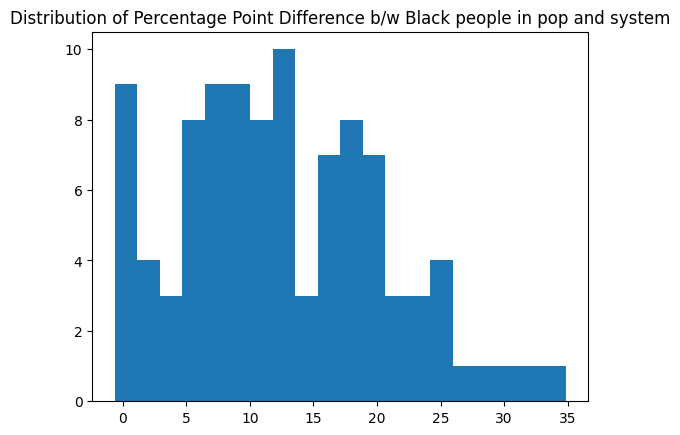

In [7]:
plt.figure()
plt.title('Distribution of Percentage Point Difference b/w Black people in pop and system')
plt.hist(black_stats.diff_in_perc_black, bins=20)

In [8]:
## how much more is the representation of black people in the system?
black_stats['times_more_black_rep'] = (black_stats.black_perc_sys / black_stats.black_pop_perc)

/var/folders/3w/vg5tdhqd3fx1m3n150wrlhhh0000gn/T/ipykernel_63851/3456443550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_stats['times_more_black_rep'] = (black_stats.black_perc_sys / black_stats.black_pop_perc)


(array([ 3., 28., 16., 13., 15.,  7.,  7.,  6.,  1.,  1.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.78453835, 1.10559363, 1.42664892, 1.7477042 , 2.06875948,
        2.38981476, 2.71087005, 3.03192533, 3.35298061, 3.67403589,
        3.99509118, 4.31614646, 4.63720174, 4.95825702, 5.27931231,
        5.60036759, 5.92142287, 6.24247815, 6.56353344, 6.88458872,
        7.205644  ]),
 <BarContainer object of 20 artists>)

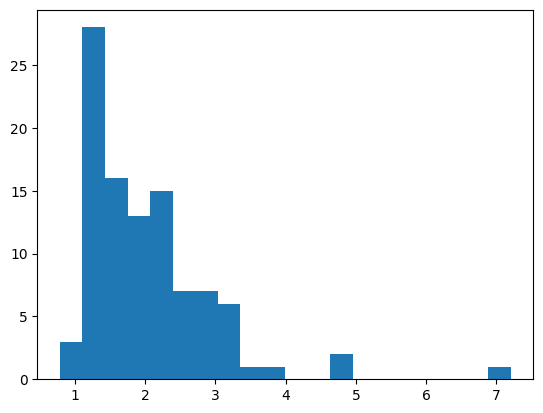

In [9]:
plt.figure()
plt.hist(black_stats.times_more_black_rep, bins=20)

### What is the average of the difference in % points of over-representation 

In [10]:
black_stats['diff_in_perc_black'].describe()

count    100.000000
mean      12.532355
std        7.994614
min       -0.635670
25%        7.020044
50%       11.716904
75%       17.661611
max       34.838257
Name: diff_in_perc_black, dtype: float64

In [11]:
black_stats.black_perc_sys.mean()

32.913383322826036

In [12]:
black_stats.black_pop_perc.mean()

20.381028023215002

On average, black people are 12.5 percentage points more in the system than in popultions

In [13]:
black_stats['times_more_black_rep'].describe()

count    100.000000
mean       2.025871
std        0.923740
min        0.784538
25%        1.353331
50%        1.837212
75%        2.405593
max        7.205644
Name: times_more_black_rep, dtype: float64

This particular county looks like it has an extreme disparity. I want to check if there is adequate data for it to make this claim

In [14]:
black_stats.loc[black_stats.times_more_black_rep > 5]

,county_fips_code,COUNTY,black_perc_sys,black_pop_perc,diff_in_perc_black,times_more_black_rep
94,37189.0,Watauga County,11.222358,1.55744,9.664918,7.205644


In [15]:
full_data.loc[full_data.COUNTY == 'Watauga County']

,Unnamed: 0,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,...,hisp_pop,other_pop,total_perc,black_pop_perc,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case
94,94,37189.0,12408.0,90051.0,5660.0,110565.0,11.222358,81.446208,5.119161,Watauga County,...,1993,1490,100.0,1.55744,91.922652,3.730743,2.789165,1.833808,14.913462,8.132508


This is weird because it seems like the counts are way higher for total cases in the system than for population. I want to go back and check if this is true 

In [16]:
checking_total_counts = full_data[['COUNTY', 'total_count_sys', 'total']]
checking_total_counts['diff_in_tot'] = (checking_total_counts.total - checking_total_counts.total_count_sys)

/var/folders/3w/vg5tdhqd3fx1m3n150wrlhhh0000gn/T/ipykernel_63851/977627588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checking_total_counts['diff_in_tot'] = (checking_total_counts.total - checking_total_counts.total_count_sys)


In [17]:
## The difference in these counts should not be negative, 
# or we are over-counting by uses cases as a proxy for people
checking_total_counts.loc[checking_total_counts['diff_in_tot'] < 0]

,COUNTY,total_count_sys,total,diff_in_tot
0,Alamance County,239406.0,157844,-81562.0
1,Alexander County,171351.0,37159,-134192.0
2,Alleghany County,13160.0,10935,-2225.0
3,Anson County,61914.0,25531,-36383.0
4,Ashe County,29831.0,26833,-2998.0
...,...,...,...,...
95,Wayne County,259012.0,124496,-134516.0
96,Wilkes County,207942.0,68525,-139417.0
97,Wilson County,218730.0,81379,-137351.0
98,Yadkin County,54481.0,37825,-16656.0


### Hispanic People Statistics

In [18]:
hisp_stats = full_data[['county_fips_code', 'COUNTY', 'hisp_perc_sys', 'hisp_pop_perc']]
hisp_stats.head()

,county_fips_code,COUNTY,hisp_perc_sys,hisp_pop_perc
0,37001.0,Alamance County,14.791192,12.820253
1,37003.0,Alexander County,8.029717,4.709492
2,37005.0,Alleghany County,18.487842,9.711934
3,37007.0,Anson County,3.278741,3.846304
4,37009.0,Ashe County,8.548155,5.757836


In [19]:
## What is the difference in these percentages?
hisp_stats['diff_in_perc_hisp'] = (hisp_stats.hisp_perc_sys - hisp_stats.hisp_pop_perc)

/var/folders/3w/vg5tdhqd3fx1m3n150wrlhhh0000gn/T/ipykernel_63851/2218565981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hisp_stats['diff_in_perc_hisp'] = (hisp_stats.hisp_perc_sys - hisp_stats.hisp_pop_perc)


In [20]:
hisp_stats['diff_in_perc_hisp'].describe()

count    100.000000
mean       1.011867
std        2.655239
min       -6.978536
25%       -0.409408
50%        0.971317
75%        2.274557
max        8.775908
Name: diff_in_perc_hisp, dtype: float64

(array([ 2.,  0.,  1.,  1.,  2.,  2.,  6.,  8., 11., 16., 18., 10.,  7.,
         4.,  3.,  3.,  3.,  1.,  1.,  1.]),
 array([-6.97853648, -6.19081426, -5.40309205, -4.61536984, -3.82764762,
        -3.03992541, -2.2522032 , -1.46448098, -0.67675877,  0.11096344,
         0.89868566,  1.68640787,  2.47413008,  3.2618523 ,  4.04957451,
         4.83729672,  5.62501894,  6.41274115,  7.20046336,  7.98818558,
         8.77590779]),
 <BarContainer object of 20 artists>)

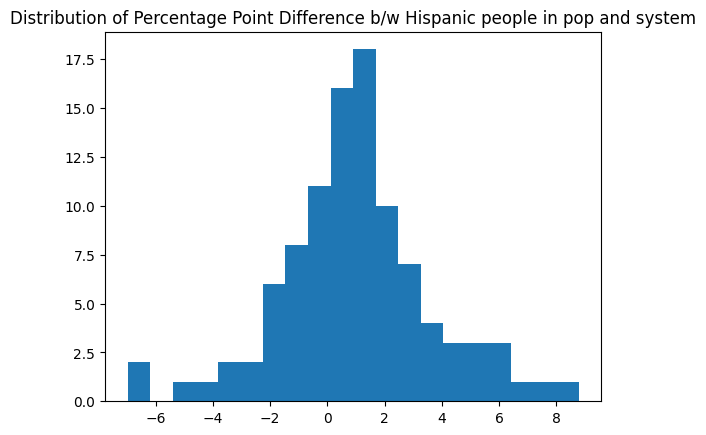

In [21]:
plt.figure()
plt.title('Distribution of Percentage Point Difference b/w Hispanic people in pop and system')
plt.hist(hisp_stats.diff_in_perc_hisp, bins=20)

### White People Stats

In [22]:
white_stats = full_data[['county_fips_code', 'COUNTY', 'white_perc_sys', 'white_pop_perc']]
white_stats.head()

,county_fips_code,COUNTY,white_perc_sys,white_pop_perc
0,37001.0,Alamance County,47.750683,64.974278
1,37003.0,Alexander County,73.660498,87.017950
2,37005.0,Alleghany County,74.787234,87.325103
3,37007.0,Anson County,33.040992,44.898359
4,37009.0,Ashe County,87.348731,92.460776


In [23]:
## What is the difference in these percentages?
white_stats['diff_in_perc_white'] = (white_stats.white_perc_sys - white_stats.white_pop_perc)

/var/folders/3w/vg5tdhqd3fx1m3n150wrlhhh0000gn/T/ipykernel_63851/236267600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_stats['diff_in_perc_white'] = (white_stats.white_perc_sys - white_stats.white_pop_perc)


In [24]:
white_stats['diff_in_perc_white'].describe()

count    100.000000
mean     -14.075224
std        7.449535
min      -36.213593
25%      -17.438066
50%      -13.374784
75%       -8.693127
max        2.796678
Name: diff_in_perc_white, dtype: float64

(array([ 2.,  1.,  1.,  1.,  1.,  3.,  5.,  3.,  6.,  8., 10., 12., 12.,
         6., 13.,  9.,  4.,  1.,  1.,  1.]),
 array([-36.21359341, -34.26307982, -32.31256622, -30.36205263,
        -28.41153904, -26.46102545, -24.51051185, -22.55999826,
        -20.60948467, -18.65897108, -16.70845749, -14.75794389,
        -12.8074303 , -10.85691671,  -8.90640312,  -6.95588953,
         -5.00537593,  -3.05486234,  -1.10434875,   0.84616484,
          2.79667843]),
 <BarContainer object of 20 artists>)

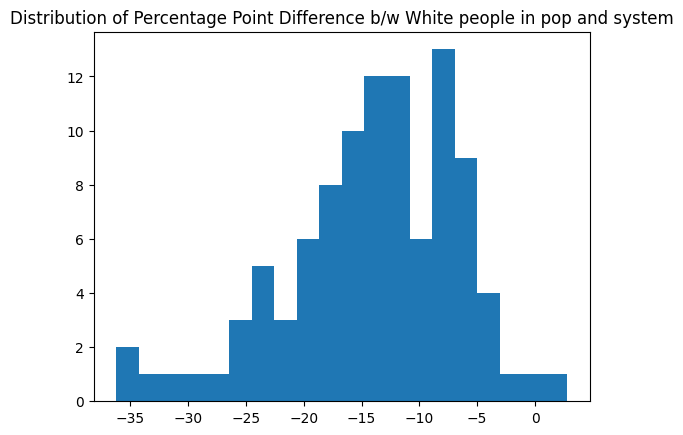

In [25]:
plt.figure()
plt.title('Distribution of Percentage Point Difference b/w White people in pop and system')
plt.hist(white_stats.diff_in_perc_white, bins=20)

In [26]:
## how much more is the representation of white people in the system?
white_stats['times_more_white_rep'] = (white_stats.white_perc_sys / white_stats.white_pop_perc)

/var/folders/3w/vg5tdhqd3fx1m3n150wrlhhh0000gn/T/ipykernel_63851/1667499756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_stats['times_more_white_rep'] = (white_stats.white_perc_sys / white_stats.white_pop_perc)


In [27]:
incarceration_rate = pd.merge(black_stats, white_stats, on=['COUNTY', 'county_fips_code'], how='outer', indicator=True)

In [28]:
incarceration_rate['times_b_more_likely_than_w'] = incarceration_rate.times_more_black_rep / incarceration_rate.times_more_white_rep

In [29]:
incarceration_rate.times_b_more_likely_than_w.describe()

count    100.000000
mean       2.687991
std        1.247493
min        0.967724
25%        1.971113
50%        2.368699
75%        3.053953
max        8.132508
Name: times_b_more_likely_than_w, dtype: float64

## Black vs White likelihood of being involved in a case

In [30]:
full_data.head()

,Unnamed: 0,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,...,hisp_pop,other_pop,total_perc,black_pop_perc,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case
0,0,37001.0,81148.0,114318.0,35411.0,239406.0,33.895558,47.750683,14.791192,Alamance County,...,20236,5078,100.0,18.988368,64.974278,12.820253,3.217100,1.114667,2.707460,2.428941
1,1,37003.0,26648.0,126218.0,13759.0,171351.0,15.551704,73.660498,8.029717,Alexander County,...,1750,887,100.0,5.885519,87.017950,4.709492,2.387039,3.903448,12.184728,3.121529
2,2,37005.0,297.0,9842.0,2433.0,13160.0,2.256839,74.787234,18.487842,Alleghany County,...,1062,58,100.0,2.432556,87.325103,9.711934,0.530407,1.030684,1.116541,1.083302
3,3,37007.0,38169.0,20457.0,2030.0,61914.0,61.648416,33.040992,3.278741,Anson County,...,982,669,100.0,48.634993,44.898359,3.846304,2.620344,1.784611,3.073931,1.722465
4,4,37009.0,546.0,26057.0,2550.0,29831.0,1.830311,87.348731,8.548155,Ashe County,...,1545,268,100.0,0.782618,92.460776,5.757836,0.998770,1.050262,2.600000,2.475573


In [31]:
full_data['white_rate_of_case'] = full_data.white_count_sys/full_data.white_pop
full_data['black_rate_of_case'] = full_data.black_count_sys/full_data.black_pop

In [32]:
full_data['times_b_more_likely_to_be_involved_in_case']= full_data.black_rate_of_case/full_data.white_rate_of_case
full_data.sample()

,Unnamed: 0,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,...,hisp_pop,other_pop,total_perc,black_pop_perc,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case
74,74,37149.0,10704.0,68603.0,11147.0,92608.0,11.558397,74.078913,12.036757,Polk County,...,1257,151,100.0,5.15807,87.951453,6.151512,0.738964,3.817216,10.155598,2.660473


In [33]:
full_data['times_b_more_likely_to_be_involved_in_case'].mean()

2.6879914006244015

In [53]:
full_data.loc[full_data['times_b_more_likely_to_be_involved_in_case'] < 1]

,Unnamed: 0,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,...,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case,trial_metric,weighted_rep_difference_b_w,hisp_rate_of_case,times_h_more_likely_to_be_involved_in_case
49,49,37099.0,1544.0,43812.0,5603.0,66707.0,2.3146,65.678265,8.399418,Jackson County,...,81.013781,4.925105,11.110845,1.296098,1.254265,0.967724,-0.026166,-0.026166,2.726521,2.103638


## Hispanic vs White likelihood of being involved in a case

In [45]:
full_data['hisp_rate_of_case'] = full_data.hisp_count_sys/full_data.hisp_pop

In [46]:
full_data['times_h_more_likely_to_be_involved_in_case']= full_data.hisp_rate_of_case/full_data.white_rate_of_case

In [47]:
full_data['times_h_more_likely_to_be_involved_in_case'].mean()

1.637991037067317

(array([ 6.,  9., 22., 26., 12., 10.,  6.,  4.,  4.,  1.]),
 array([0.44023798, 0.7518217 , 1.06340541, 1.37498912, 1.68657283,
        1.99815654, 2.30974025, 2.62132396, 2.93290767, 3.24449138,
        3.55607509]),
 <BarContainer object of 10 artists>)

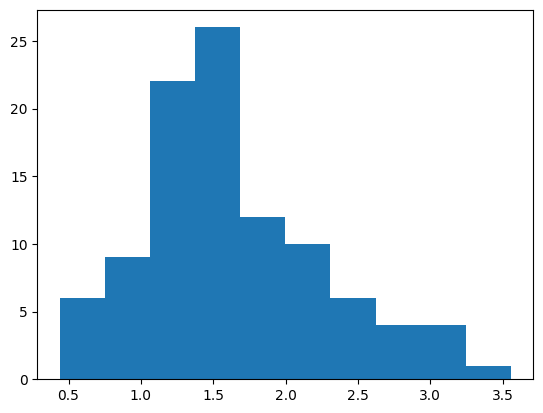

In [48]:
plt.hist(full_data['times_h_more_likely_to_be_involved_in_case'])

In [50]:
full_data.loc[full_data['times_h_more_likely_to_be_involved_in_case'] < 1]

,Unnamed: 0,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,...,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case,trial_metric,weighted_rep_difference_b_w,hisp_rate_of_case,times_h_more_likely_to_be_involved_in_case
17,17,37035.0,54157.0,223452.0,24789.0,312628.0,17.323144,71.475364,7.929232,Catawba County,...,76.114405,9.412096,6.383578,1.879691,4.286268,2.280305,1.202273,1.202273,1.686327,0.897130
19,19,37039.0,1190.0,37700.0,858.0,41858.0,2.842945,90.066415,2.049787,Cherokee County,...,91.486728,2.996759,4.143757,1.500498,3.156499,2.103635,1.086501,1.086501,1.042527,0.694788
22,22,37045.0,53717.0,130185.0,4720.0,191704.0,28.020803,67.909381,2.462129,Cleveland County,...,73.406294,3.400730,2.379480,1.827620,2.659652,1.455255,0.421164,0.421164,1.430303,0.782604
25,25,37051.0,330236.0,191829.0,39462.0,597679.0,55.253071,32.095657,6.602541,Cumberland County,...,44.640979,11.343106,7.443970,1.291343,2.713547,2.101337,0.791832,0.791832,1.045462,0.809593
26,26,37053.0,2409.0,18290.0,526.0,21755.0,11.073316,84.072627,2.417835,Currituck County,...,87.511387,3.913336,3.152850,0.827827,1.759679,2.125661,1.081428,1.081428,0.532389,0.643116
35,35,37071.0,113750.0,277146.0,21221.0,420632.0,27.042641,65.887997,5.045027,Gaston County,...,73.585955,6.749856,3.955636,1.759545,3.383000,1.922656,0.826135,0.826135,1.468785,0.834752
38,38,37077.0,71452.0,85794.0,11768.0,174897.0,40.853760,49.054015,6.728532,Granville County,...,58.246586,8.644001,2.066561,2.517725,3.934365,1.562667,0.473866,0.473866,2.327071,0.924275
39,39,37079.0,91583.0,57860.0,13849.0,170714.0,53.647035,33.892944,8.112399,Greene County,...,46.920557,15.090935,2.070374,5.855683,12.107747,2.067692,0.771244,0.771244,4.357772,0.744195
54,54,37109.0,27191.0,163484.0,9187.0,203508.0,13.361146,80.332960,4.514319,Lincoln County,...,85.271539,7.121385,2.254546,2.381517,6.310281,2.649690,1.554146,1.554146,1.602477,0.672881
61,61,37123.0,19830.0,42663.0,9517.0,74270.0,26.699879,57.443113,12.814057,Montgomery County,...,63.279286,15.802514,2.273638,2.456556,3.875318,1.577541,0.524275,0.524275,2.194374,0.893273


In [38]:
full_data.columns

Index(['Unnamed: 0', 'county_fips_code', 'black_count_sys', 'white_count_sys',
       'hisp_count_sys', 'total_count_sys', 'black_perc_sys', 'white_perc_sys',
       'hisp_perc_sys', 'COUNTY', 'total', 'black_pop', 'white_pop',
       'hisp_pop', 'other_pop', 'total_perc', 'black_pop_perc',
       'white_pop_perc', 'hisp_pop_perc', 'other_pop_perc',
       'white_rate_of_case', 'black_rate_of_case',
       'times_b_more_likely_to_be_involved_in_case'],
      dtype='object')

In [44]:
## saving this 
full_data.to_csv('/Users/preetkhowaja/Desktop/qsides/10_cleaned_data/admissions_analysis_table.csv')

In [36]:
## Creating a map for this


## New Metric for Scatterplot

In [39]:
full_data.head()

,Unnamed: 0,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,...,hisp_pop,other_pop,total_perc,black_pop_perc,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case
0,0,37001.0,81148.0,114318.0,35411.0,239406.0,33.895558,47.750683,14.791192,Alamance County,...,20236,5078,100.0,18.988368,64.974278,12.820253,3.217100,1.114667,2.707460,2.428941
1,1,37003.0,26648.0,126218.0,13759.0,171351.0,15.551704,73.660498,8.029717,Alexander County,...,1750,887,100.0,5.885519,87.017950,4.709492,2.387039,3.903448,12.184728,3.121529
2,2,37005.0,297.0,9842.0,2433.0,13160.0,2.256839,74.787234,18.487842,Alleghany County,...,1062,58,100.0,2.432556,87.325103,9.711934,0.530407,1.030684,1.116541,1.083302
3,3,37007.0,38169.0,20457.0,2030.0,61914.0,61.648416,33.040992,3.278741,Anson County,...,982,669,100.0,48.634993,44.898359,3.846304,2.620344,1.784611,3.073931,1.722465
4,4,37009.0,546.0,26057.0,2550.0,29831.0,1.830311,87.348731,8.548155,Ashe County,...,1545,268,100.0,0.782618,92.460776,5.757836,0.998770,1.050262,2.600000,2.475573


In [43]:
full_data['weighted_rep_difference_b_w'] = (full_data.black_perc_sys/full_data.black_pop_perc ) - (full_data.white_perc_sys/full_data.white_pop_perc)
full_data.trial_metric.describe()

count    100.000000
mean       1.256056
std        0.911542
min       -0.026166
25%        0.688448
50%        1.043843
75%        1.570296
max        6.319614
Name: trial_metric, dtype: float64

- Look at people identifiers, 
- split by felonies and misdemeanours